In [2]:
import altair as alt
alt.renderers.enable('notebook')
import pandas as pd
import numpy as np
import os
from vega_datasets import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.getcwd()

'D:\\AnalyticLabs\\usdata'

In [34]:
data_unemp = pd.read_excel('Unemployment.xls', sheet_name = 'Unemployment Med HH Inc')
data_unemp.dropna(inplace=True)
data_unemp.reset_index(drop=True, inplace=True)
data_unemp_agg = data_unemp[data_unemp.FIPS % 1000 == 0]
data_unemp_agg.reset_index(inplace=True, drop=True)
data_unemp = data_unemp[data_unemp.FIPS % 1000 != 0]

In [35]:
data_pov = pd.read_excel('PovertyEstimates.xls', sheet_name = 'Poverty Data 2017')
data_pov.dropna(inplace=True)
data_pov.reset_index(drop=True, inplace=True)
data_pov_agg = data_pov[data_pov.FIPStxt % 1000 == 0]
data_pov_agg.reset_index(inplace=True, drop=True)
data_pov = data_pov[data_pov.FIPStxt % 1000 != 0]

In [36]:
data_edu = pd.read_excel('Education.xls', sheet_name = 'Education 1970 to 2017')
data_edu.dropna(inplace=True)
data_edu.reset_index(drop=True, inplace=True)
data_edu_agg = data_edu[data_edu['FIPS Code'] % 1000 == 0]
data_edu_agg.reset_index(inplace=True, drop=True)
data_edu = data_edu[data_edu['FIPS Code'] % 1000 != 0]

In [89]:
data_unemp_agg.head()

,FIPS,State,Area_name,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,1000,AL,Alabama,2175612,2089127,86485,4.0,2176489,2053477,123012,...,2178243.0,2081676.0,96567.0,4.4,2198837.0,2112347.0,86490.0,3.9,48193.0,100.0
1,2000,AK,Alaska,350785,328579,22206,6.3,356109,332285,23824,...,360759.0,335682.0,25077.0,7.0,356886.0,333375.0,23511.0,6.6,74058.0,100.0
2,4000,AZ,Arizona,3034016,2917117,116899,3.9,3104863,2913903,190960,...,3327949.0,3165127.0,162822.0,4.9,3439755.0,3273550.0,166205.0,4.8,56508.0,100.0
3,5000,AR,Arkansas,1369284,1296572,72712,5.3,1375257,1300017,75240,...,1347630.0,1297652.0,49978.0,3.7,1351496.0,1301459.0,50037.0,3.7,45916.0,100.0
4,6000,CA,California,17893080,16931590,961490,5.4,18178123,16854482,1323641,...,19205295.0,18285492.0,919803.0,4.8,19398212.0,18582802.0,815410.0,4.2,71785.0,100.0


In [3]:
#data_unemp.columns Unemployment_rate_2018

In [96]:
data_unemp_agg.head()

,FIPS,State,Area_name,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,1000,AL,Alabama,2175612,2089127,86485,4.0,2176489,2053477,123012,...,2178243.0,2081676.0,96567.0,4.4,2198837.0,2112347.0,86490.0,3.9,48193.0,100.0
1,2000,AK,Alaska,350785,328579,22206,6.3,356109,332285,23824,...,360759.0,335682.0,25077.0,7.0,356886.0,333375.0,23511.0,6.6,74058.0,100.0
2,4000,AZ,Arizona,3034016,2917117,116899,3.9,3104863,2913903,190960,...,3327949.0,3165127.0,162822.0,4.9,3439755.0,3273550.0,166205.0,4.8,56508.0,100.0
3,5000,AR,Arkansas,1369284,1296572,72712,5.3,1375257,1300017,75240,...,1347630.0,1297652.0,49978.0,3.7,1351496.0,1301459.0,50037.0,3.7,45916.0,100.0
4,6000,CA,California,17893080,16931590,961490,5.4,18178123,16854482,1323641,...,19205295.0,18285492.0,919803.0,4.8,19398212.0,18582802.0,815410.0,4.2,71785.0,100.0


In [19]:
#data_unemp.info()

In [5]:
#Unemployement rates of differen years
Unemployment_rate_columns = [x for x in data_unemp.columns if 'Unemployment_rate' in x]
Unemployed_columns = [x for x in data_unemp.columns if 'Unemployed_' in x]
Employed_columns = [x for x in data_unemp.columns if 'Employed_' in x]
Civilian_labor_force_columns = [x for x in data_unemp.columns if 'Civilian_labor_force_' in x]


In [21]:
import plotly.graph_objects as go

df_map = pd.read_csv('us_map.csv')
df_map['Unemployment_rate_2007'] = data_unemp_agg[data_unemp_agg.State.isin(df_map.code)]['Unemployment_rate_2007']
df_map['Unemployment_rate_2012'] = data_unemp_agg[data_unemp_agg.State.isin(df_map.code)]['Unemployment_rate_2012']
df_map['Unemployment_rate_2018'] = data_unemp_agg[data_unemp_agg.State.isin(df_map.code)]['Unemployment_rate_2018']

fig07 = go.Figure(data=go.Choropleth(
    locations=df_map['code'], # Spatial coordinates
    z = df_map['Unemployment_rate_2007'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Unemployment Rate",
    text = df_map['state']
))

fig07.update_layout(
    title_text = '2007 US Unemployment Rate',
    geo_scope='usa', # limite map scope to USA
)

fig07.show()

fig12 = go.Figure(data=go.Choropleth(
    locations=df_map['code'], # Spatial coordinates
    z = df_map['Unemployment_rate_2012'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Unemployment Rate",
    text = df_map['state']
))

fig12.update_layout(
    title_text = '2012 US Unemployment Rate',
    geo_scope='usa', # limite map scope to USA
)

fig12.show()

fig18 = go.Figure(data=go.Choropleth(
    locations=df_map['code'], # Spatial coordinates
    z = df_map['Unemployment_rate_2018'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Unemployment Rate",
    text = df_map['state']
))

fig18.update_layout(
    title_text = '2018 US Unemployment Rate',
    geo_scope='usa', # limite map scope to USA
)

fig18.show()

In [34]:
date_range = np.arange(2007,2019,1)

In [ ]:
df_hist1 = data_unemp_agg.copy()
df_hist1['Sum_of_unemployement_rate'] = data_unemp_agg[Unemployment_rate_columns].sum(axis=1)
df_hist1_sorted = df_hist1.sort_values('Sum_of_unemployement_rate', ascending=False)

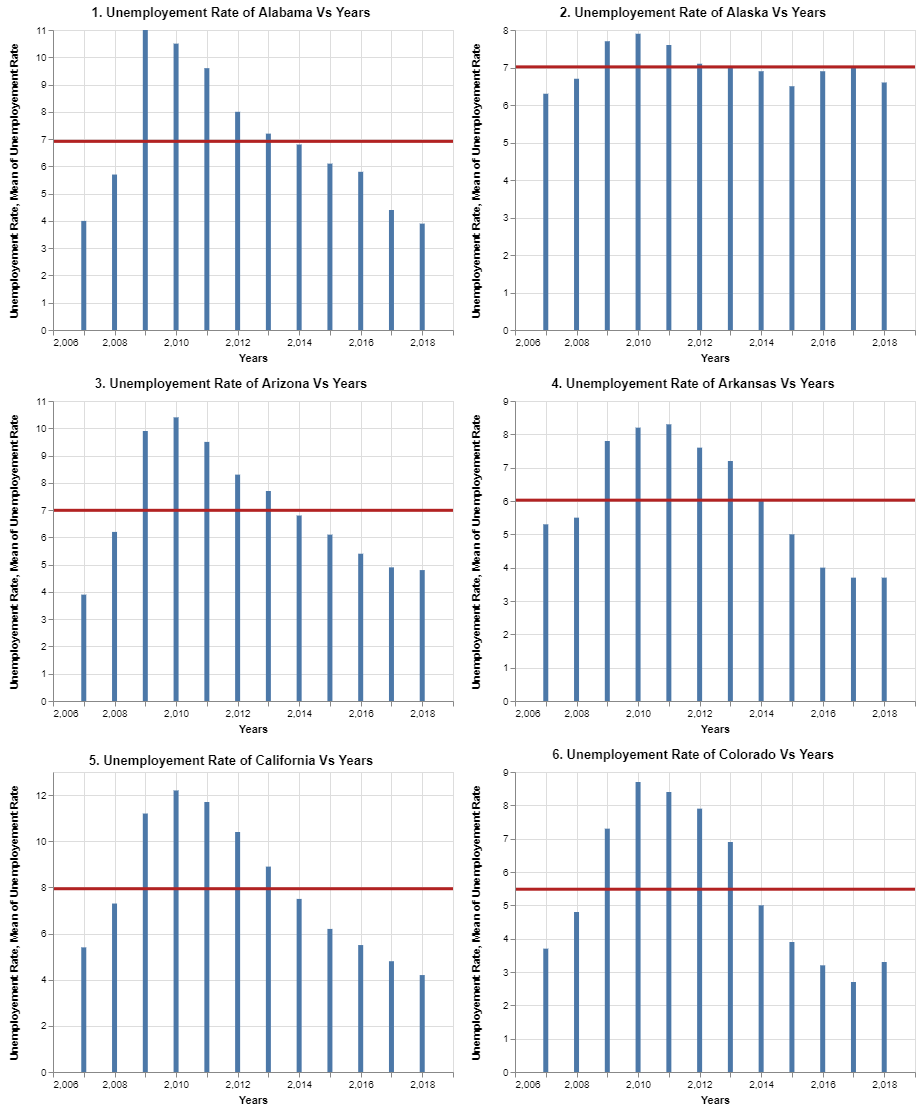

In [99]:
brush = alt.selection(type='interval', encodings=['x'])

bars = alt.Chart().mark_bar().encode(
    x='Years:Q',
    y='Unemployement Rate:Q',
    opacity=alt.condition(brush, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).properties(
    width=400,
    height=300).add_selection(
    brush
)

line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(Unemployement Rate):Q',
    size=alt.SizeValue(3)
).transform_filter(
    brush
)

df1 = df_hist1_sorted.loc[0,:][Unemployment_rate_columns].values
df1 = pd.DataFrame(df1 , date_range)
df1 = df1.reset_index()
df1.columns = ['Years','Unemployement Rate']


df2 = df_hist1_sorted.loc[1,:][Unemployment_rate_columns].values
df2 = pd.DataFrame(df2 , date_range)
df2 = df2.reset_index()
df2.columns = ['Years','Unemployement Rate']

df3 = df_hist1_sorted.loc[2,:][Unemployment_rate_columns].values
df3 = pd.DataFrame(df3 , date_range)
df3 = df3.reset_index()
df3.columns = ['Years','Unemployement Rate']

df4 = df_hist1_sorted.loc[3,:][Unemployment_rate_columns].values
df4 = pd.DataFrame(df4 , date_range)
df4 = df4.reset_index()
df4.columns = ['Years','Unemployement Rate']

df5 = df_hist1_sorted.loc[4,:][Unemployment_rate_columns].values
df5 = pd.DataFrame(df5 , date_range)
df5 = df5.reset_index()
df5.columns = ['Years','Unemployement Rate']

df6 = df_hist1_sorted.loc[5,:][Unemployment_rate_columns].values
df6 = pd.DataFrame(df6 , date_range)
df6 = df6.reset_index()
df6.columns = ['Years','Unemployement Rate']

alt.vconcat(alt.hconcat(alt.layer(bars, line, data=df1, title = '1. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[0,'Area_name']), alt.layer(bars, line, data=df2, title = '2. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[1,'Area_name']))
,alt.hconcat(alt.layer(bars, line, data=df3, title = '3. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[2,'Area_name']), alt.layer(bars, line, data=df4, title = '4. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[3,'Area_name']))
,alt.hconcat(alt.layer(bars, line, data=df5, title = '5. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[4,'Area_name']), alt.layer(bars, line, data=df6, title = '6. Unemployement Rate of %s Vs Years' %df_hist1_sorted.loc[5,'Area_name']))
)

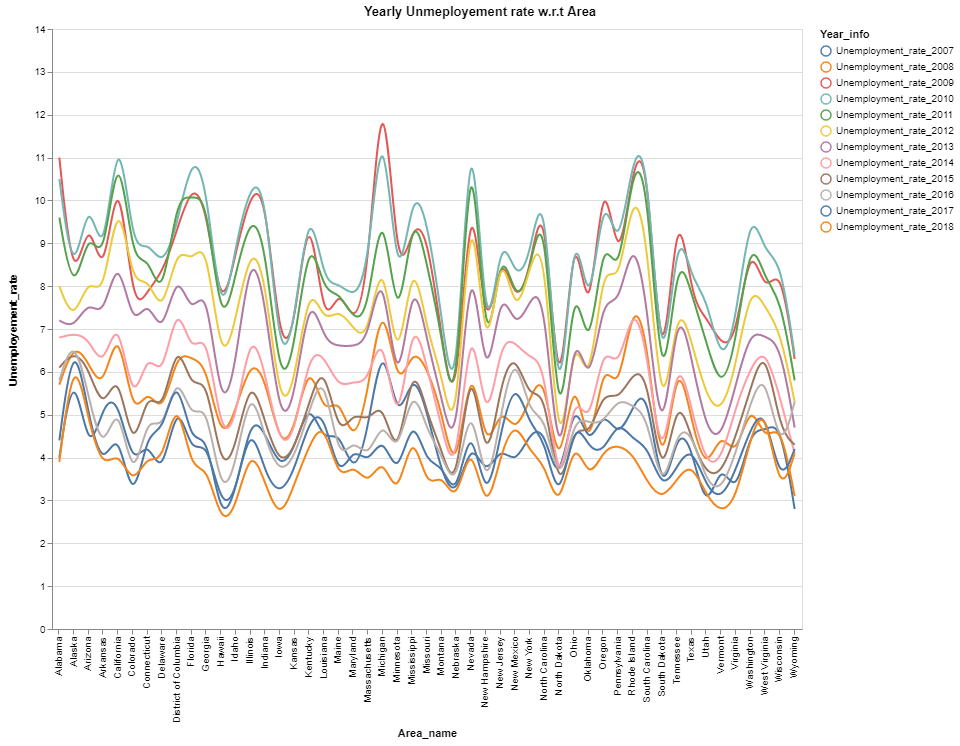

In [161]:
import altair as alt
import pandas as pd
import numpy as np

data_unemp_agg_line = data_unemp_agg[Unemployment_rate_columns+['Area_name']].set_index('Area_name')
data_unemp_agg_line = data_unemp_agg_line.reset_index().melt('Area_name', var_name = 'Year_info', value_name='Unemployement_rate')

# source = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
#                     columns=['A', 'B', 'C'], index=pd.RangeIndex(100, name='x'))
# source = source.reset_index().melt('x', var_name='category', value_name='y')

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Area_name'], empty='none')

# The basic line
line = alt.Chart(data_unemp_agg_line).mark_line(interpolate='basis').encode(
    x='Area_name:N',
    y='Unemployement_rate:Q',
    color='Year_info:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(data_unemp_agg_line).mark_point().encode(
    x='Area_name:N',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Unemployement_rate:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(data_unemp_agg_line).mark_rule(color='gray').encode(
    x='Area_name:N',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text, title='Yearly Unmeployement rate w.r.t Area'
).properties(
    width=750, height=600
)

In [164]:
data_unemp_agg_heat = data_unemp_agg.copy()
diff =  data_unemp_agg_heat['Unemployment_rate_2018'].values - data_unemp_agg_heat['Unemployment_rate_2007'].values
x, y = (list(x) for x in zip(*sorted(zip(diff, data_unemp_agg_heat['Area_name'].values), 
                                                            reverse = True)))

# Now I want to extract out the top 15 and bottom 15 countries 
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

Text(0.5,1,'Movement in Unemployment rate ( Warmer: Higher rate, Cooler: Lower rate )')

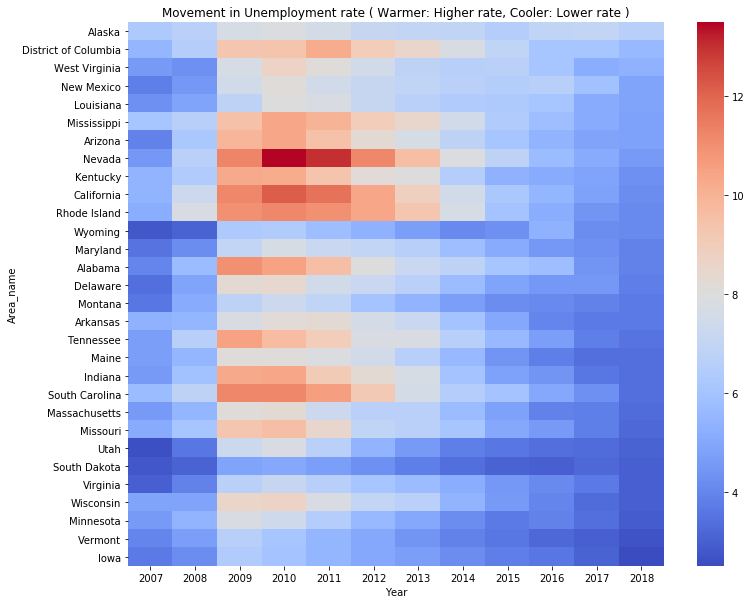

In [186]:
keys = [c for c in data_unemp_agg_heat if 'rate' in c][:-2]
keys

country_resize = pd.melt(data_unemp_agg_heat, id_vars='Area_name',value_vars=keys, value_name='key' )
country_resize['Year'] = country_resize['variable']
country_resize['Year'] = [country_resize.loc[i,'Year'].split('_')[-1] for i in range(len(country_resize)) ]

mask = country_resize['Area_name'].isin(Y)
country_final = country_resize[mask]

# Finally plot the seaborn heatmap
plt.figure(figsize=(12,10))
country_pivot = country_final.pivot("Area_name","Year",  "key")
country_pivot = country_pivot.sort_values('2018', ascending=False)
ax = sns.heatmap(country_pivot, cmap='coolwarm', annot=False, linewidths=0, linecolor='white')
plt.title('Movement in Unemployment rate ( Warmer: Higher rate, Cooler: Lower rate )')

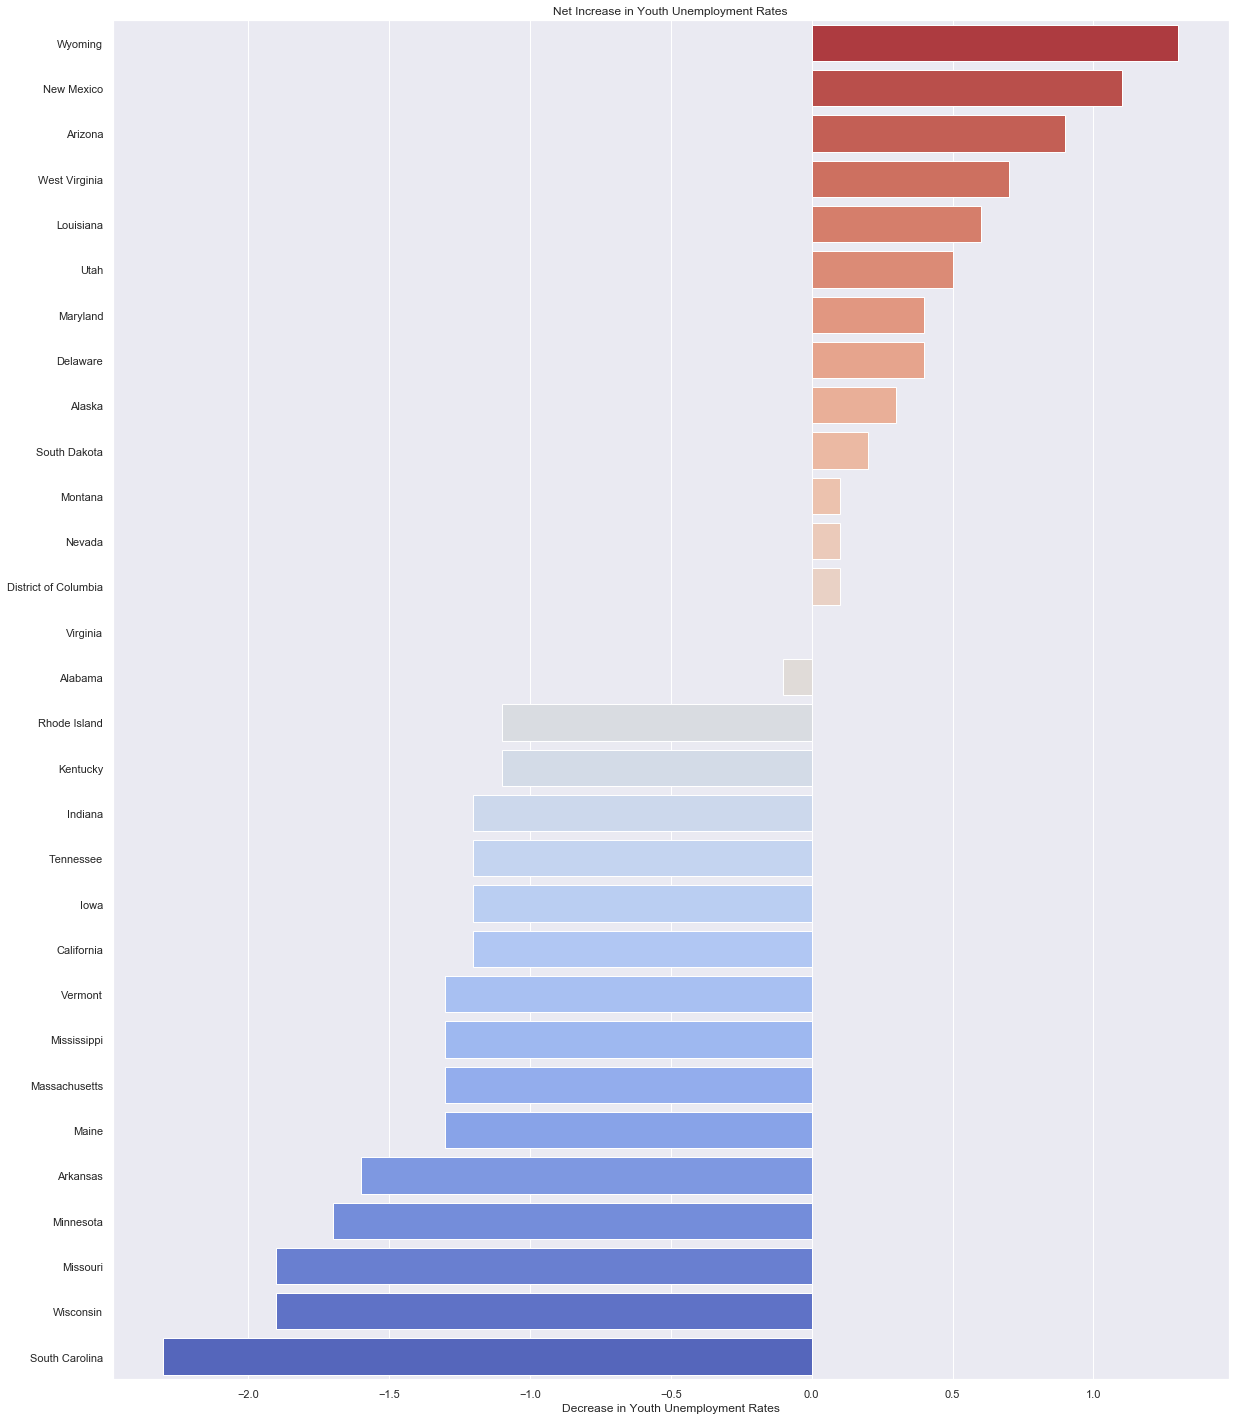

In [187]:
# Plot using Seaborn's barplot
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(20, 25))
colors_cw = sns.color_palette('coolwarm', len(X))
sns.barplot(X, Y, palette = colors_cw[::-1])
Text = ax.set(xlabel='Decrease in Youth Unemployment Rates', 
              title='Net Increase in Youth Unemployment Rates')

In [23]:
df_Unemployed = pd.melt(data_unemp[Unemployed_columns])
df_Unemployed['Year'] = df_Unemployed['variable'].apply(lambda row: row.split('_')[1])

df_Employed = pd.melt(data_unemp[Employed_columns])
df_Employed['Year'] = df_Employed['variable'].apply(lambda row: row.split('_')[1])

sns.set(rc={'figure.figsize':(15,11)})

Text(0.5, 1.0, 'Unemployed People Distribution Year-wise')

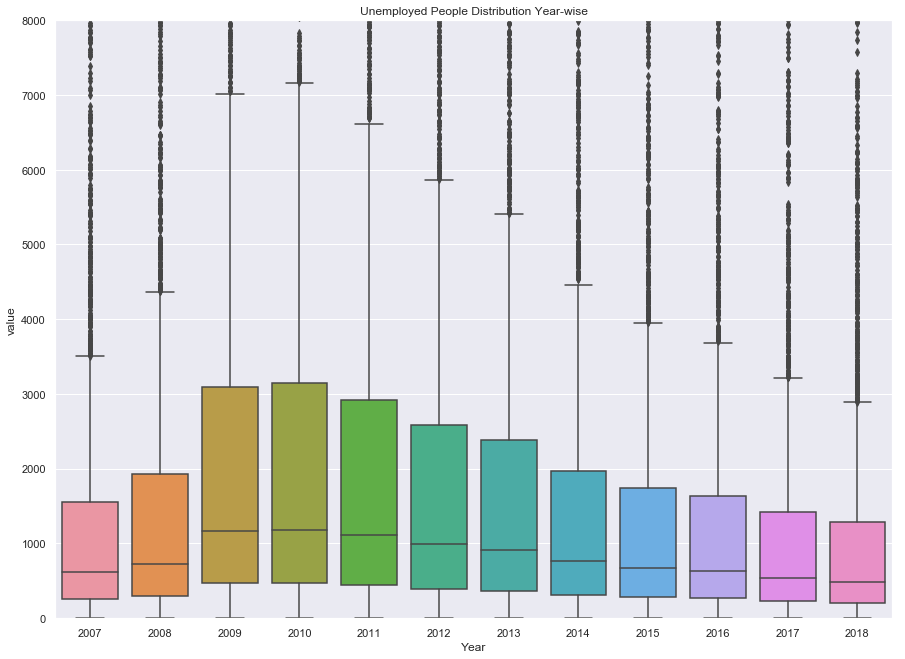

In [32]:
ax1 = sns.boxplot(x="Year", y="value", data=df_Unemployed)
ax1.set(ylim=(-5, 8000))
ax1.set_title('Unemployed People Distribution Year-wise')

Text(0.5, 1.0, 'Employed People Distribution Year-wise')

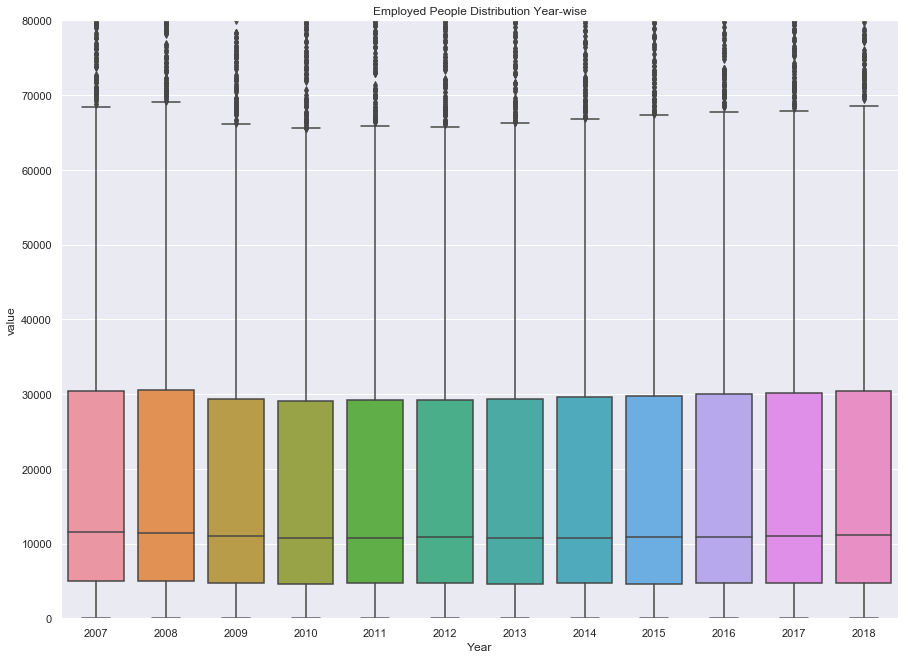

In [33]:
ax2 = sns.boxplot(x="Year", y="value", data=df_Employed)
ax2.set(ylim=(-5, 80000))
ax2.set_title('Employed People Distribution Year-wise')

C:\Users\bijon\Anaconda3\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


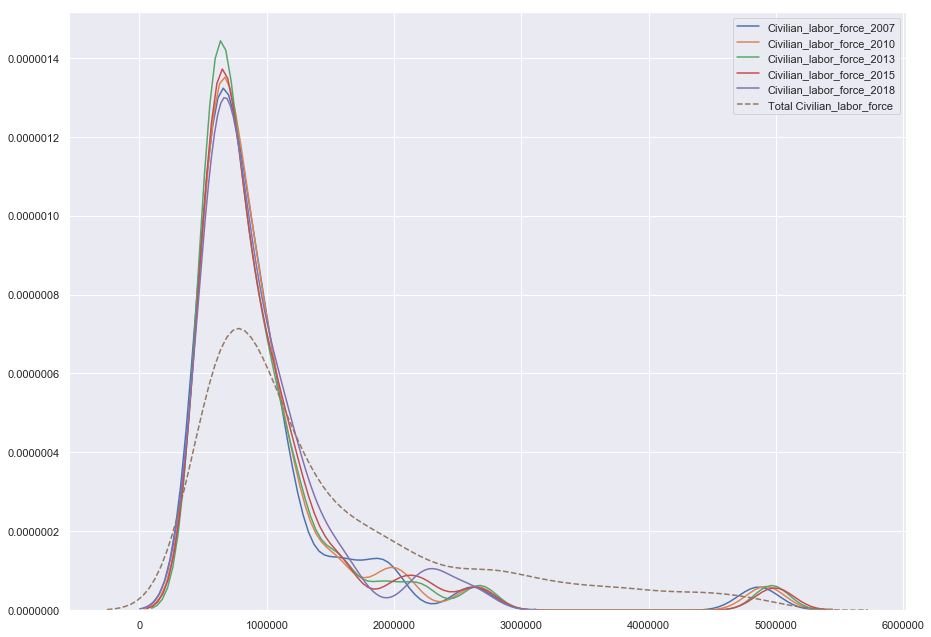

In [75]:
data_unemp['Total Civilian_labor_force'] = data_unemp[Civilian_labor_force_columns].sum(axis=1)

sns.kdeplot(data_unemp[Civilian_labor_force_columns[0]], clip=(500000, 5000000) )
sns.kdeplot(data_unemp[Civilian_labor_force_columns[3]], clip=(500000, 5000000) )
sns.kdeplot(data_unemp[Civilian_labor_force_columns[6]], clip=(500000, 5000000) )
sns.kdeplot(data_unemp[Civilian_labor_force_columns[8]], clip=(500000, 5000000) )
sns.kdeplot(data_unemp[Civilian_labor_force_columns[11]], clip=(500000, 5000000) )
sns.kdeplot(data_unemp['Total Civilian_labor_force'], linestyle="--", clip=(500000, 5000000) )

C:\Users\bijon\Anaconda3\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


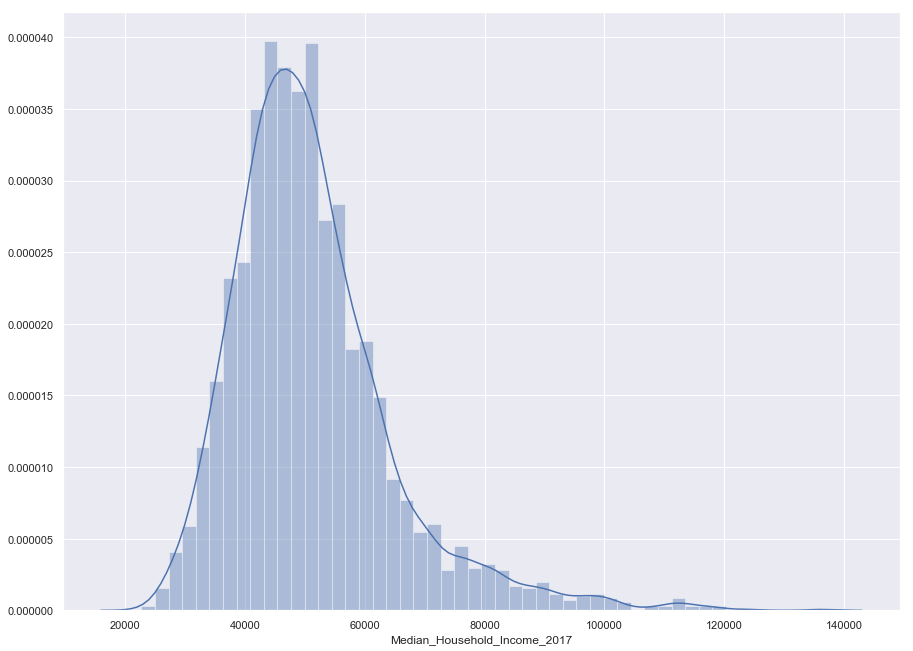

In [34]:
sns.distplot(data_unemp.Median_Household_Income_2017)

Text(0.5, 1.0, 'Median Household Income of top-5 states')

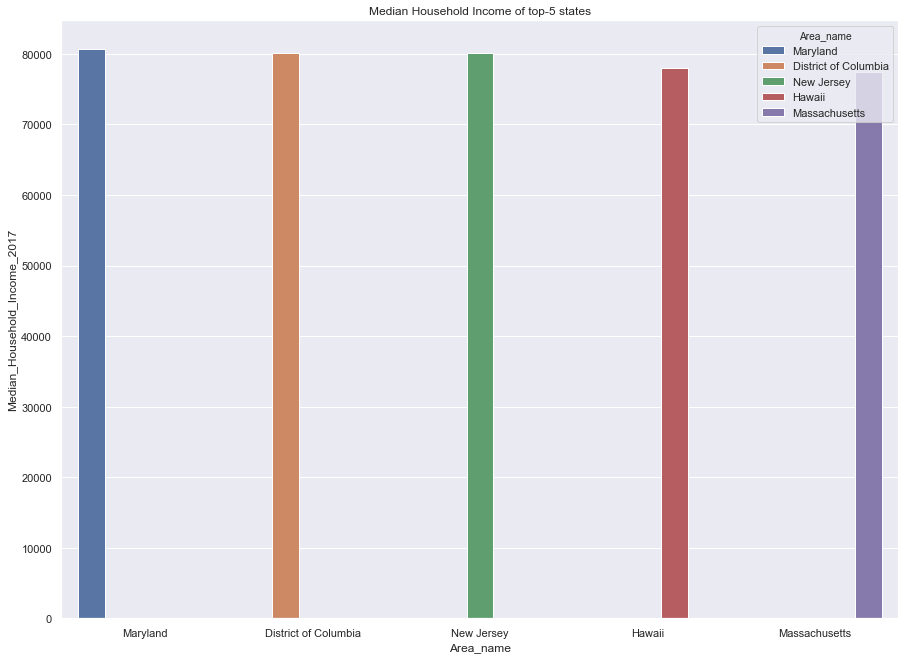

In [90]:
df_plot = data_unemp_agg.sort_values(["Median_Household_Income_2017"], ascending=False)
ax5 = sns.barplot(x="Area_name", y="Median_Household_Income_2017",hue="Area_name", data=df_plot[:5])
ax5.set_title('Median Household Income of top-5 states')
# h = sns.scatterplot(x="Area_name", y="Median_Household_Income_2017", data=data_unemp_agg)
# h.set_xticks(rotation=45)

In [56]:
def GenerateClass(i):
    if i>70000: #<=7:
        return 'High'
    elif (i >=60000 and i <70000): #(x[i]>7 and x[i]<=9):
        return 'Moderate'
    elif (i >=50000 and i <60000): #(x[i]>9 and x[i]<=11):
        return 'Medium'
    else:
        return 'Low'

In [88]:
df_3ddd = pd.merge(data_unemp_agg, data_pov_agg, on = 'Area_name', how='left')
df_3dd = pd.merge(df_3ddd, data_edu_agg, on = 'Area_name', how='left')
df_3d['Income tag'] = df_3dd['Median_Household_Income_2017'].apply(lambda row: GenerateClass(row))
df_3d = df_3d[['Percent of adults with a bachelor\'s degree or higher, 2013-17','Median_Household_Income_2017','POVALL_2017','Income tag' ]]
df_3d.head()

,"Percent of adults with a bachelor's degree or higher, 2013-17",Median_Household_Income_2017,POVALL_2017,Income tag
0,24.5,48193.0,802263.0,Low
1,29.0,74058.0,79428.0,High
2,28.4,56508.0,1023337.0,Medium
3,22.0,45916.0,475883.0,Low
4,32.6,71785.0,5164169.0,High


In [107]:
import plotly.express as px
import plotly.graph_objects as go

fig1 = px.scatter_3d(df_3d, x='Percent of adults with a bachelor\'s degree or higher, 2013-17', y='Median_Household_Income_2017', z='POVALL_2017',
              color='Income tag')
fig1.update_layout(
    title=go.layout.Title(
        text="Higher Degree Vs Median Income Vs Poverty Vs Income Class: 2017",
        xref="paper",
        x=0
    )
)
fig1.show()


In [108]:
df_3d2 = df_3dd[['Percent of adults with less than a high school diploma, 2013-17','Unemployed_2017','Median_Household_Income_2017','POVALL_2017']]
df_3d2['Income tag'] = df_3d2['Median_Household_Income_2017'].apply(lambda row: GenerateClass(row))
fig2 = px.scatter_3d(df_3d2, x='Percent of adults with less than a high school diploma, 2013-17', y='Unemployed_2017', z='POVALL_2017',
              size='Median_Household_Income_2017', color='Income tag', size_max = 50)
fig2.update_layout(
    title=go.layout.Title(
        text="Less Education Vs Total Unemployed Vs Poverty Vs Income Class: 2017",
        xref="paper",
        x=0
    )
)
fig2.show()




C:\Users\BIG1KOR\AppData\Local\Continuum\anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



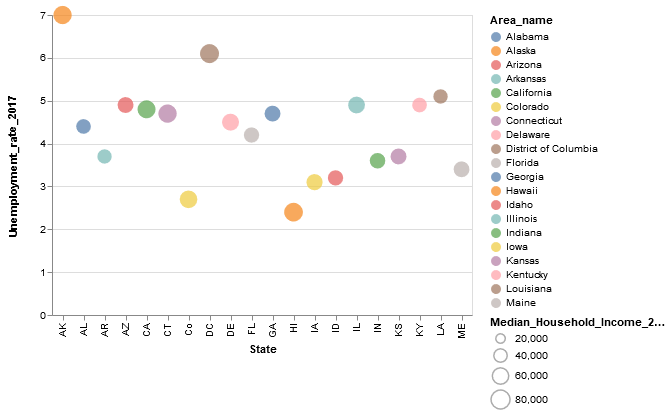

In [8]:
source = data_unemp_agg[:20]

alt.Chart(source).mark_circle().encode(
    x='State:O',
    y='Unemployment_rate_2017:Q',
#     alt.X('Median_Household_Income_2017', scale=alt.Scale(zero=False)),
#     alt.Y('Unemployment_rate_2017', scale=alt.Scale(zero=False, padding=1)),
    color='Area_name',
    size='Median_Household_Income_2017'
)

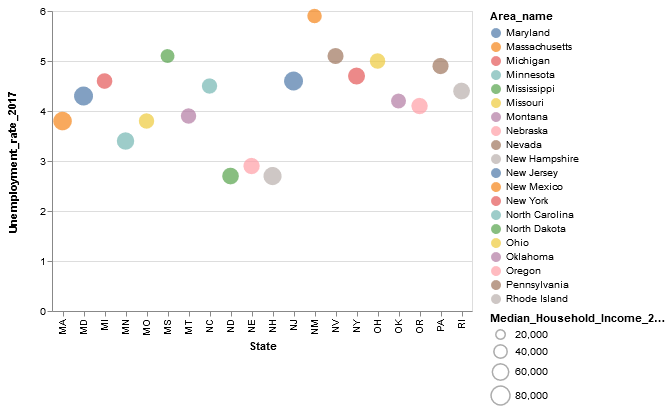

In [5]:
source = data_unemp_agg[20:40]

alt.Chart(source).mark_circle().encode(
    x='State:O',
    y='Unemployment_rate_2017:Q',
#     alt.X('Median_Household_Income_2017', scale=alt.Scale(zero=False)),
#     alt.Y('Unemployment_rate_2017', scale=alt.Scale(zero=False, padding=1)),
    color='Area_name',
    size='Median_Household_Income_2017'
)

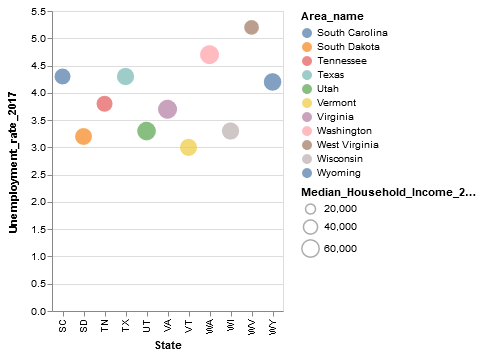

In [6]:
source = data_unemp_agg[40:60]

alt.Chart(source).mark_circle().encode(
    x='State:O',
    y='Unemployment_rate_2017:Q',
#     alt.X('Median_Household_Income_2017', scale=alt.Scale(zero=False)),
#     alt.Y('Unemployment_rate_2017', scale=alt.Scale(zero=False, padding=1)),
    color='Area_name',
    size='Median_Household_Income_2017'
)